

#  E-Waste Image Classification Dataset EDA






##  Dataset Overview

###  Dataset Name: E-Waste Image Dataset  
###  Source:  https://www.kaggle.com/datasets/akshat103/e-waste-image-dataset 

Each directory contains 10 subfolders, each representing one class of e-waste:

- PCB (Printed Circuit Board)
- Player
- Battery
- Microwave
- Mobile
- Mouse
- Printer
- Television
- Washing Machine
- Keyboard

</div>

In [1]:
# Install required libraries
!pip install matplotlib seaborn opencv-python scikit-learn

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 2.4 MB/s eta 0:00:17
   - -------------------------------------- 1.0/39.5 MB 2.8 MB/s eta 0:00:14
   -- ------------------------------------- 2.1/39.5 MB 3.4 MB/s eta 0:00:12
   --- ------------------------------------ 3.1/39.5 MB 3.9 MB/s eta 0:00:10
   --- ------------------------------------ 3.9/39.5 MB 3.9 MB/s eta 0:00:10
   ---- ----------------------------------- 4.7/39.5 MB 3.9 MB/s eta 0:00:09
   ----- ---------------------------------- 5.8/39.5 MB 3.9 MB/s eta 0:00:09
   ------ --------------------------------- 6.6/39.5 MB 3.9 MB/s eta 0:00:09
   ------- -------------------------------- 7.3/39.5 MB 3.9 MB/s eta 0:00:09
   -------- ------------------------------- 8.1/39.5 MB 3.9 MB/s eta 0:00:09
   --------- ------------------------------ 8.9/39.5 MB 3.9 MB/s eta 0:00:08
   --------- ------------------------------ 9.7/39.5 MB 3.9 MB/s eta 0:00:08
   ---

In [6]:
import tensorflow as tf  # Core TensorFlow library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split


###  Format: Folder-based image classification dataset  
- `Train/`: Images used for training the model  
- `Test/`: Images used for model evaluation  
- `Validation/`: Images used to fine-tune and validate the model  


In [7]:
testpath= r'C:\Users\Admin\Downloads\modified-dataset\test'
trainpath= r'C:\Users\Admin\Downloads\modified-dataset\train'
validpath = r'C:\Users\Admin\Downloads\modified-dataset\val'

datasets = {
    "Train": trainpath,
    "Validation": validpath,
    "Test": testpath
}

## 1.  Explore and Understand the Data
- Load image dataset using tools like `image_dataset_from_directory`.
- Visualize sample images from each class.
- Check the number of images per class to ensure balance.
- Understand image dimensions, color channels, and class labels.



### Load image dataset using tools like `image_dataset_from_directory`.
### Split data into training, validation, and testing sets.

`tf.keras.utils.image_dataset_from_directory(...)`  
Used to load images from a directory where each subfolder represents a class.

---

**path**  
Root directory path containing one subdirectory per class.

**shuffle=True**  
Randomly shuffles the image data. Useful during training to prevent the model from learning the order of the data.

**image_size=(128, 128)**  
Resizes all loaded images to this target size (width, height).  
This must match the input size expected by the model.

**batch_size=32**  
Number of images per batch during training.  
This affects memory usage and the frequency of model updates.

**validation_split=False**  
If set to a float (e.g., `0.2`), splits a portion of the data for validation.  
If `False`, no split is applied.


In [8]:
datatrain= tf.keras.utils.image_dataset_from_directory(trainpath,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)

Found 2400 files belonging to 10 classes.


In [9]:
datatest=tf.keras.utils.image_dataset_from_directory(testpath,shuffle = False, image_size = (128,128), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


In [10]:
datavalid = tf.keras.utils.image_dataset_from_directory(validpath,shuffle = True, image_size = (128,128), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


In [11]:

print(len(datatrain.class_names))
class_names = datatrain.class_names
print(class_names)

10
['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


### Visualize sample images from each class.

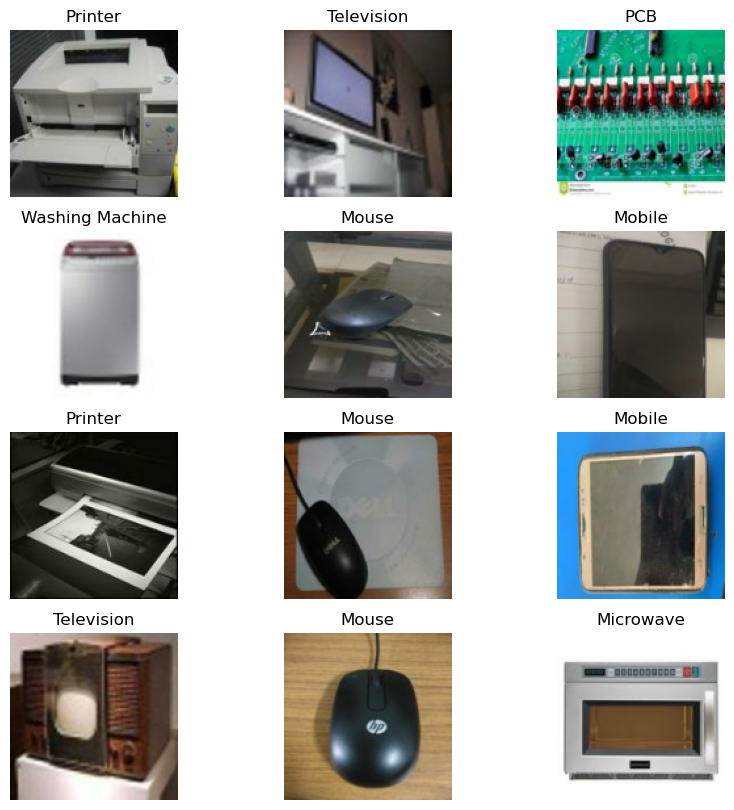

In [12]:

# Set the size of the entire figure (width=10, height=10 inches)
plt.figure(figsize=(10, 10))

# Take one batch from the dataset and iterate over the images and labels
for images, labels in datatrain.take(1):
    # Display the first 12 images from the batch
    for i in range(12):
        # Create a 4x3 grid of subplots and select the (i+1)th position
        ax = plt.subplot(4, 3, i + 1)

        # Display the image; convert the tensor to a NumPy array and ensure correct type
        plt.imshow(images[i].numpy().astype("uint8"))

        # Set the title of the subplot to the class name of the image
        plt.title(class_names[labels[i]])

        # Remove axis ticks and labels for clarity
        plt.axis("off")


- ## Check the number of images per class to ensure balance
- ## Understand image properties like Image dimensions, Class labels


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(dataset, title="Class Distribution"):
    """
    Plots the number of items per class in a given dataset.
    Args:
        dataset: A tf.data.Dataset object created using image_dataset_from_directory
        title: Title for the plot (e.g., 'Train Data Distribution')
    """
    class_counts = {}  # Dictionary to hold the count of each class

    # Iterate through the batches in the dataset
    for images, labels in dataset:
        for label in labels.numpy():
            class_name = dataset.class_names[label]
            class_counts[class_name] = class_counts.get(class_name, 0) + 1

    # Prepare data for plotting
    class_names = list(class_counts.keys())
    counts = list(class_counts.values())

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=class_names, y=counts)
    plt.title(title)
    plt.xlabel("Class Name")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


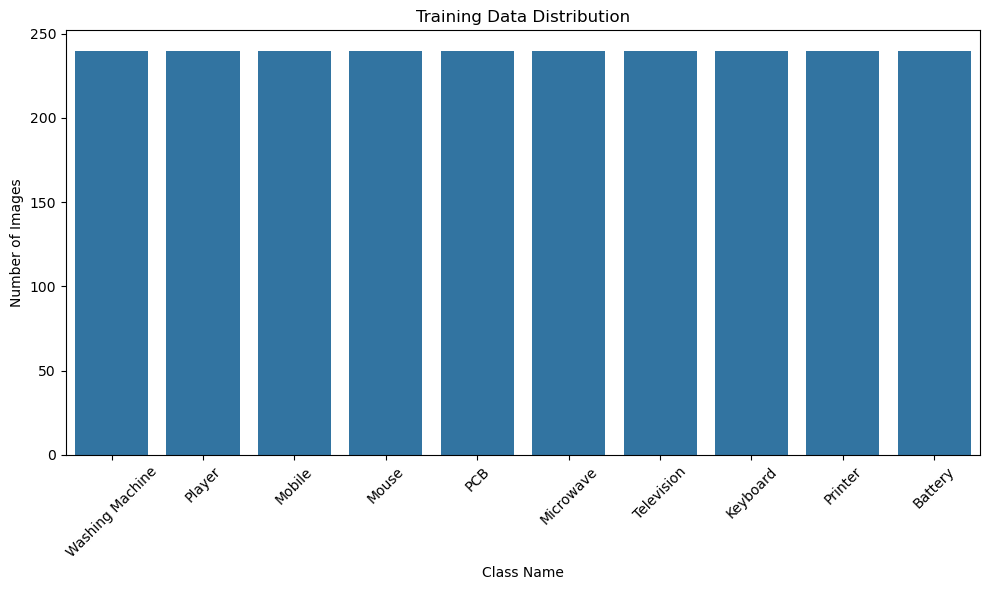

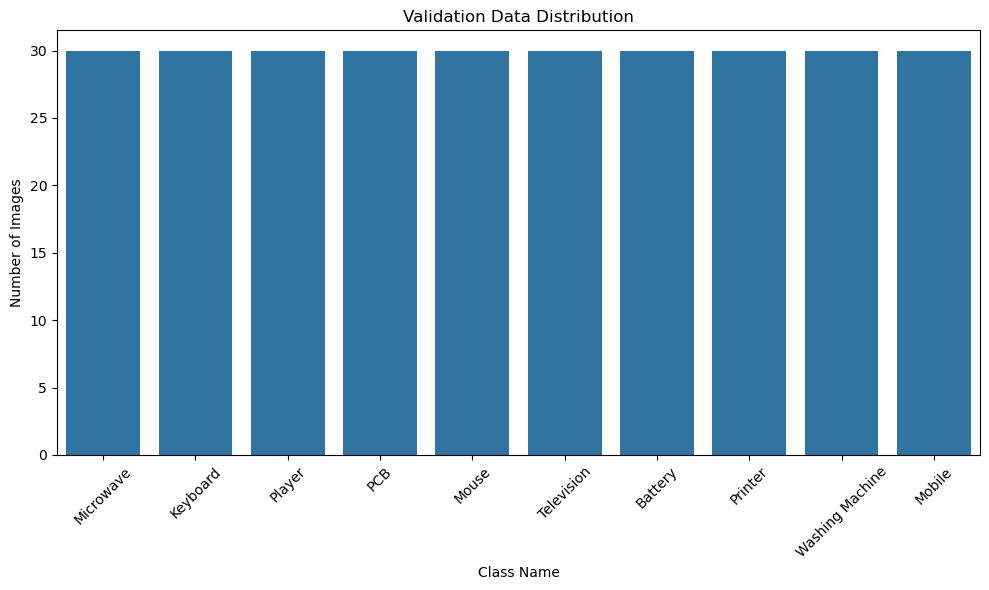

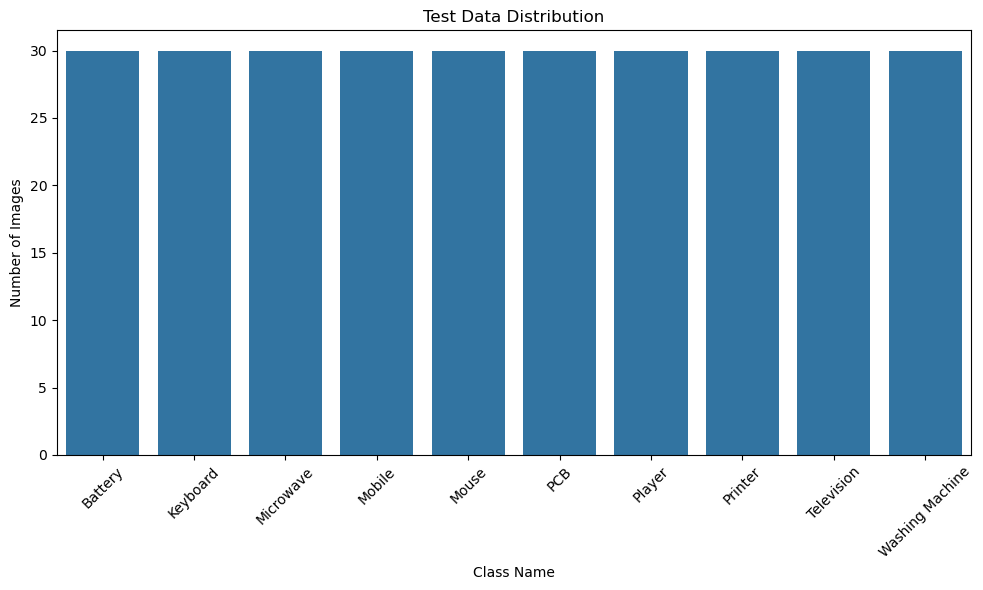

In [14]:
plot_class_distribution(datatrain, "Training Data Distribution")
plot_class_distribution(datavalid, "Validation Data Distribution")
plot_class_distribution(datatest, "Test Data Distribution")

# Count Images per Class in Each Split

In [15]:
def count_images_per_class(dataset_path):
    class_counts = {}
    for cls in os.listdir(dataset_path):
        cls_path = os.path.join(dataset_path, cls)
        if os.path.isdir(cls_path):
            class_counts[cls] = len(os.listdir(cls_path))
    return class_counts

# Gather counts
df_all_counts = pd.DataFrame()

for split_name, path in datasets.items():
    counts = count_images_per_class(path)
    temp_df = pd.DataFrame(list(counts.items()), columns=["Class", "Count"])
    temp_df["Split"] = split_name
    df_all_counts = pd.concat([df_all_counts, temp_df], ignore_index=True)

df_all_counts


Class  Count       Split
0           Battery    240       Train
1          Keyboard    240       Train
2         Microwave    240       Train
3            Mobile    240       Train
4             Mouse    240       Train
5               PCB    240       Train
6            Player    240       Train
7           Printer    240       Train
8        Television    240       Train
9   Washing Machine    240       Train
10          Battery     30  Validation
11         Keyboard     30  Validation
12        Microwave     30  Validation
13           Mobile     30  Validation
14            Mouse     30  Validation
15              PCB     30  Validation
16           Player     30  Validation
17          Printer     30  Validation
18       Television     30  Validation
19  Washing Machine     30  Validation
20          Battery     30        Test
21         Keyboard     30        Test
22        Microwave     30        Test
23           Mobile     30        Test
24            Mouse     30        Test
25              PCB     30        Test
26           Player     30        Test
27          Printer     30        Test
28       Television     30        Test
29  Washing Machine     30        Test

# Visualize Class Distributions

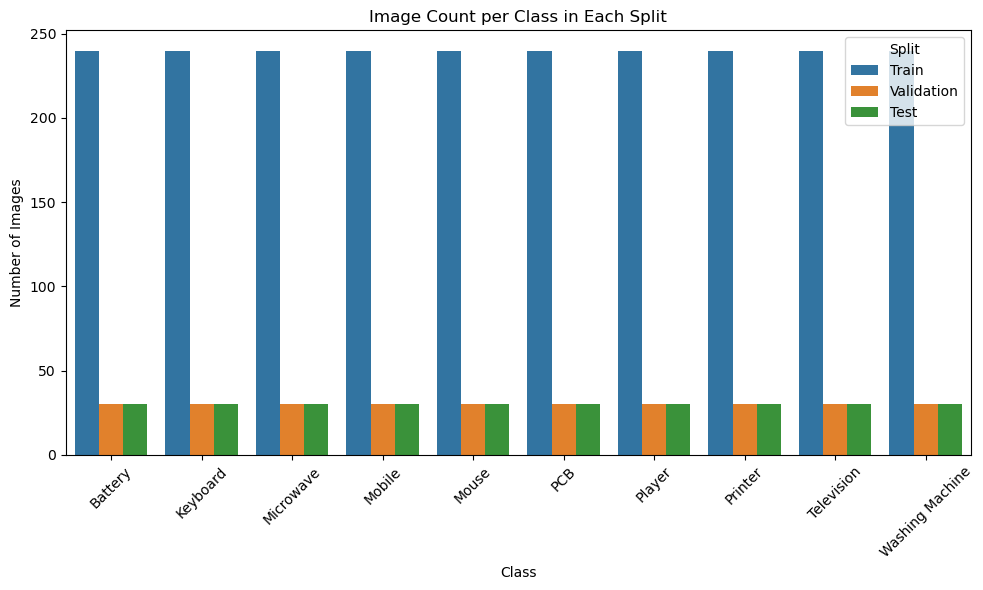

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_all_counts, x="Class", y="Count", hue="Split")
plt.title("Image Count per Class in Each Split")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Sample Images from Train

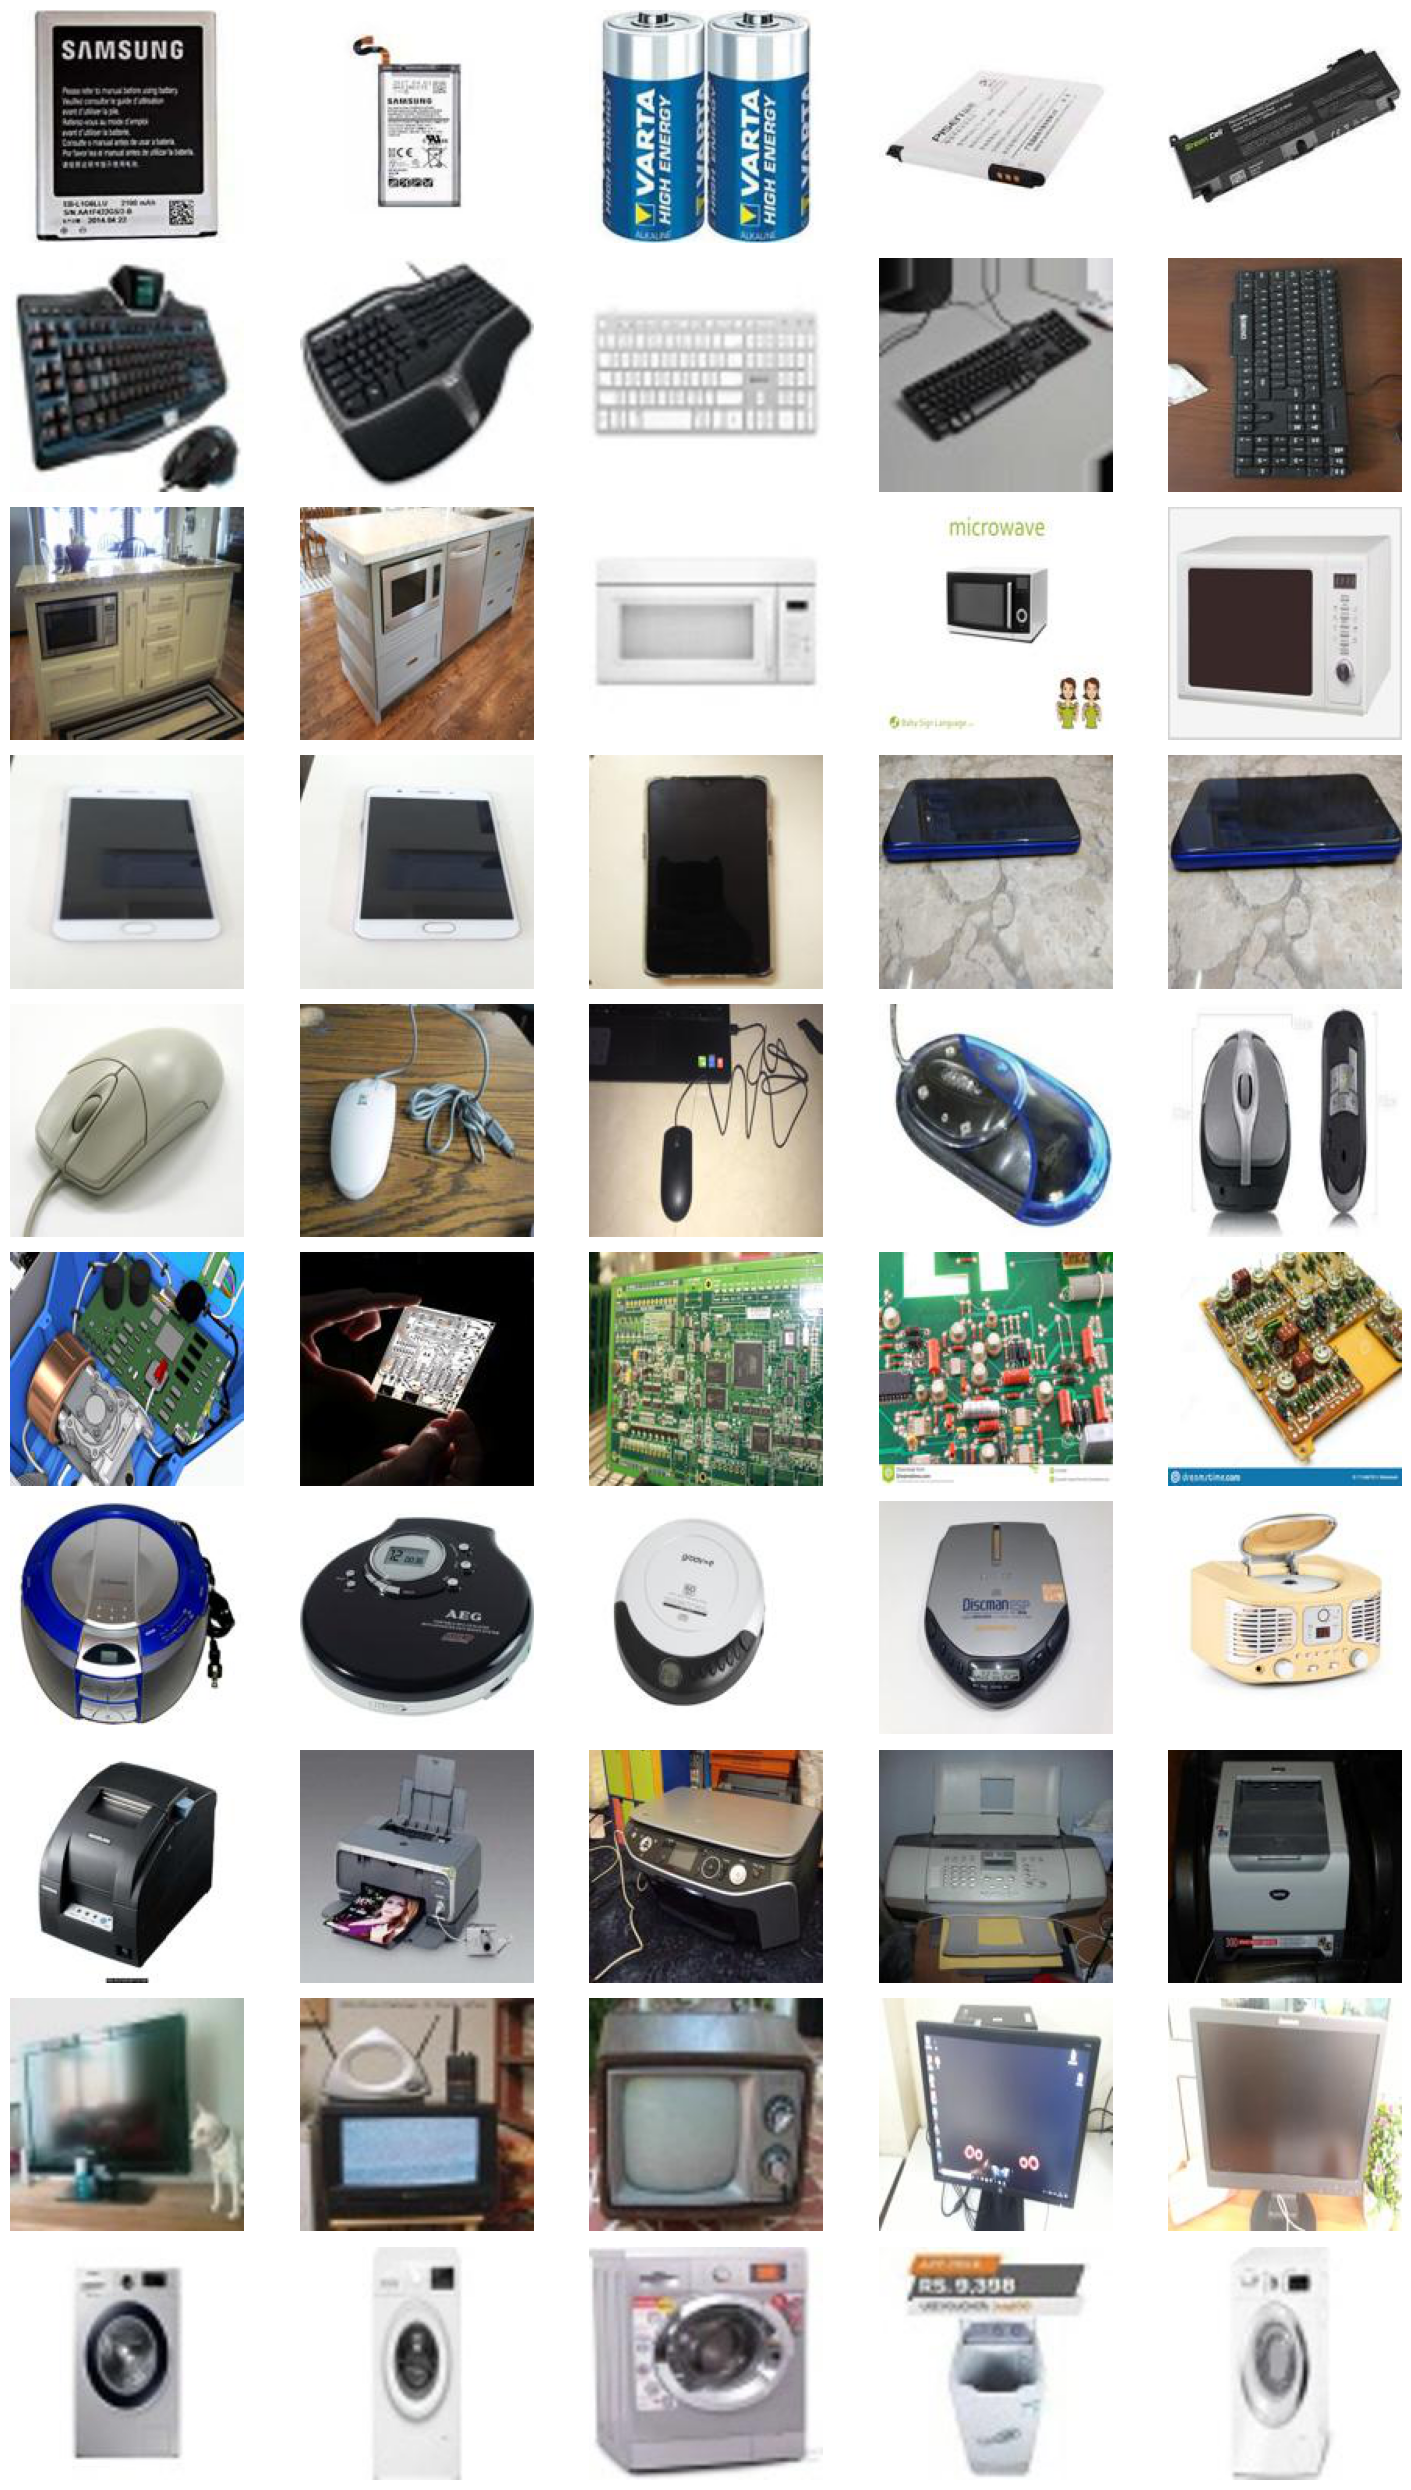

In [18]:
def show_sample_images_from_path(base_path, classes, n_images=5):
    import matplotlib.pyplot as plt
    from PIL import Image

    plt.figure(figsize=(15, len(classes)*2.5))
    for i, cls in enumerate(classes):
        cls_path = os.path.join(base_path, cls)
        images = os.listdir(cls_path)[:n_images]
        for j, img_name in enumerate(images):
            img_path = os.path.join(cls_path, img_name)
            try:
                img = Image.open(img_path)
                plt.subplot(len(classes), n_images, i*n_images + j + 1)
                plt.imshow(img)
                plt.axis('off')
                if j == 0:
                    plt.ylabel(cls, size=12)
            except:
                continue
    plt.tight_layout()
    plt.show()

class_names = os.listdir(trainpath)
show_sample_images_from_path(trainpath, class_names, n_images=5)


# Image Dimensions in Train Set

In [19]:
def analyze_image_shapes(base_path):
    image_data = []

    for cls in os.listdir(base_path):
        cls_path = os.path.join(base_path, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            try:
                img = Image.open(img_path)
                image_data.append({
                    'Class': cls,
                    'Width': img.width,
                    'Height': img.height,
                    'Aspect_Ratio': img.width / img.height
                })
            except:
                pass
    return pd.DataFrame(image_data)

df_shapes_train = analyze_image_shapes(trainpath)
df_shapes_train.head()


Class  Width  Height  Aspect_Ratio
0  Battery    150     150           1.0
1  Battery    150     150           1.0
2  Battery    150     150           1.0
3  Battery    150     150           1.0
4  Battery    150     150           1.0

# Shape & Aspect Ratio Distribution

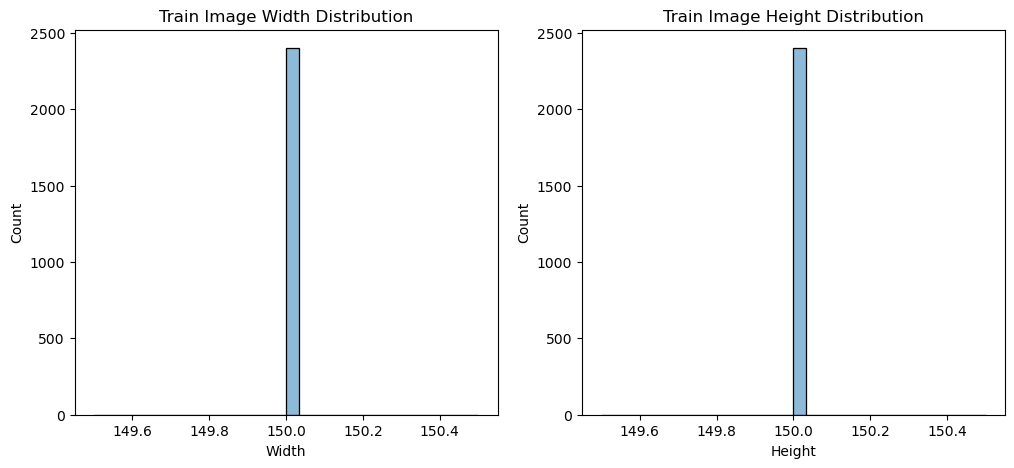

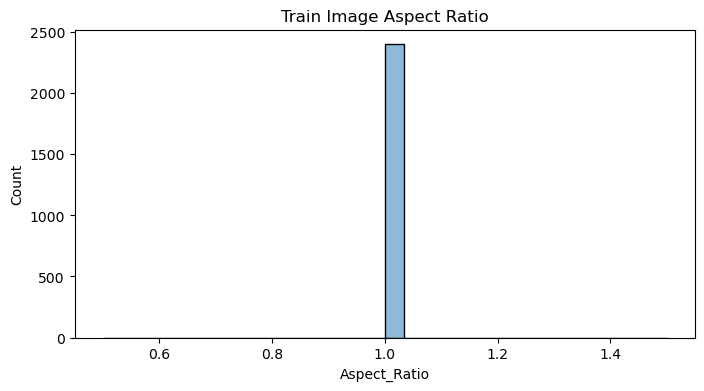

In [20]:
# Width & height
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_shapes_train['Width'], bins=30, ax=axs[0], kde=True)
axs[0].set_title('Train Image Width Distribution')

sns.histplot(df_shapes_train['Height'], bins=30, ax=axs[1], kde=True)
axs[1].set_title('Train Image Height Distribution')
plt.show()

# Aspect Ratio
plt.figure(figsize=(8, 4))
sns.histplot(df_shapes_train['Aspect_Ratio'], bins=30, kde=True)
plt.title("Train Image Aspect Ratio")
plt.show()


# Check for Corrupted Images

In [22]:
def check_corrupted_images_in_split(split_path):
    corrupted = []
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            try:
                img = Image.open(img_path)
                img.verify()
            except:
                corrupted.append(img_path)
    return corrupted

corrupted_train = check_corrupted_images_in_split(trainpath)
print(f"Corrupted images in train: {len(corrupted_train)}")


Corrupted images in train: 0


# Class Imbalance Ratio

In [23]:
train_counts = count_images_per_class(trainpath)
max_class = max(train_counts.values())
imbalance_ratio = {cls: round(max_class / count, 2) for cls, count in train_counts.items()}
print("Class Imbalance Ratio:", imbalance_ratio)


Class Imbalance Ratio: {'Battery': 1.0, 'Keyboard': 1.0, 'Microwave': 1.0, 'Mobile': 1.0, 'Mouse': 1.0, 'PCB': 1.0, 'Player': 1.0, 'Printer': 1.0, 'Television': 1.0, 'Washing Machine': 1.0}


# Image Format & Color Analysis

In [24]:
from collections import Counter

def analyze_image_modes_and_formats(base_path):
    formats = []
    modes = []

    for cls in os.listdir(base_path):
        cls_path = os.path.join(base_path, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            try:
                img = Image.open(img_path)
                formats.append(img.format)
                modes.append(img.mode)
            except:
                continue
    return Counter(formats), Counter(modes)

formats_train, modes_train = analyze_image_modes_and_formats(trainpath)
print("Image Formats:", formats_train)
print("Color Modes:", modes_train)


Image Formats: Counter({'JPEG': 2400})
Color Modes: Counter({'RGB': 2400})


In [25]:
!pip install torch torchvision matplotlib seaborn scikit-learn

   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 1.0/216.1 MB 7.2 MB/s eta 0:00:30
   ---------------------------------------- 1.8/216.1 MB 4.8 MB/s eta 0:00:45
   ---------------------------------------- 2.6/216.1 MB 4.4 MB/s eta 0:00:49
    --------------------------------------- 3.7/216.1 MB 4.3 MB/s eta 0:00:50
    --------------------------------------- 4.5/216.1 MB 4.2 MB/s eta 0:00:51
    --------------------------------------- 5.2/216.1 MB 4.1 MB/s eta 0:00:51
   - -------------------------------------- 6.0/216.1 MB 4.1 MB/s eta 0:00:51
   - -------------------------------------- 7.1/216.1 MB 4.1 MB/s eta 0:00:52
   - -------------------------------------- 7.9/216.1 MB 4.1 MB/s eta 0:00:52
   - -------------------------------------- 8.7/216.1 MB 4.0 MB/s eta 0:00:52
   - -------------------------------------- 9.4/216.1 MB 4.0 MB/s eta 0:00:52
   - -------------------------------------- 10.2/216.1 MB 4.0 MB/s eta 

In [26]:
import os
import torch
import torchvision.transforms as transforms
from torchvision import models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Load Dataset
testpath = r'C:\Users\Admin\Downloads\modified-dataset\test'

# Transform: resize to what ResNet expects
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load test dataset
test_dataset = ImageFolder(root=testpath, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Class mapping
class_names = test_dataset.classes
print("Classes:", class_names)


Classes: ['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


In [29]:
# Pretrained ResNet Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, len(class_names))  # replace final layer

# Since we're using it for inference without training:
model = model.to(device)
model.eval()


C:\Users\Admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Admin/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:12<00:00, 3.70MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [30]:
# Prediction on Test dataset
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())


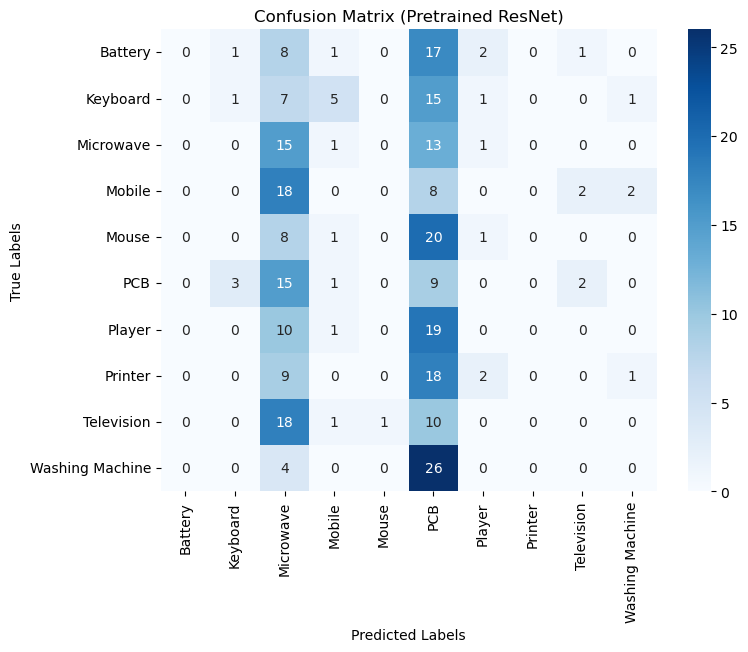

In [31]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Pretrained ResNet)")
plt.show()
